In [131]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import sys
import argparse
import os
import numpy as np
from numpy.random import uniform
import pandas as pd
from itertools import product
import datetime
import glob
import re
%matplotlib inline
# %matplotlib notebook

In [132]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# plt.rcParams['figure.figsize'] = (10,5) 
# plt.rcParams['figure.figsize'] = (10,5.625)   # 16:9
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio

In [2]:
def plot2d(location, temp="450", zmax=20, xlabel="xlabel", ylabel="ylabel", title = ""):
    x = 1
    y = 2
    z = 3
    zmin = 0
    titlefontsize = 28
    filename = location + f"pmf-{temp}.dat"
    data = np.loadtxt(filename)
    data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
    data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
    data = data[~(data[:,z] < zmin)]

    xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
    yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
    zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
    # plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
    jet = cm = plt.get_cmap('jet')
    print(jet)
    # plt.contourf(xi, yi, zi, 20, cmap='rainbow')
    plt.figure()
    plt.contourf(xi, yi, zi, 30, cmap='jet')
    # plt.xlim(xmin, xmax)
    plt.clim(zmin, zmax)
    plt.colorbar()

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, y=1.02, fontsize = titlefontsize)
    #plt.tight_layout()
    #plt.axis('equal')
    #plt.axes().set_aspect('equal')
    #plt.axes().set_aspect('scaled')
    # plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
    plt.show()

<IPython.core.display.Javascript object>


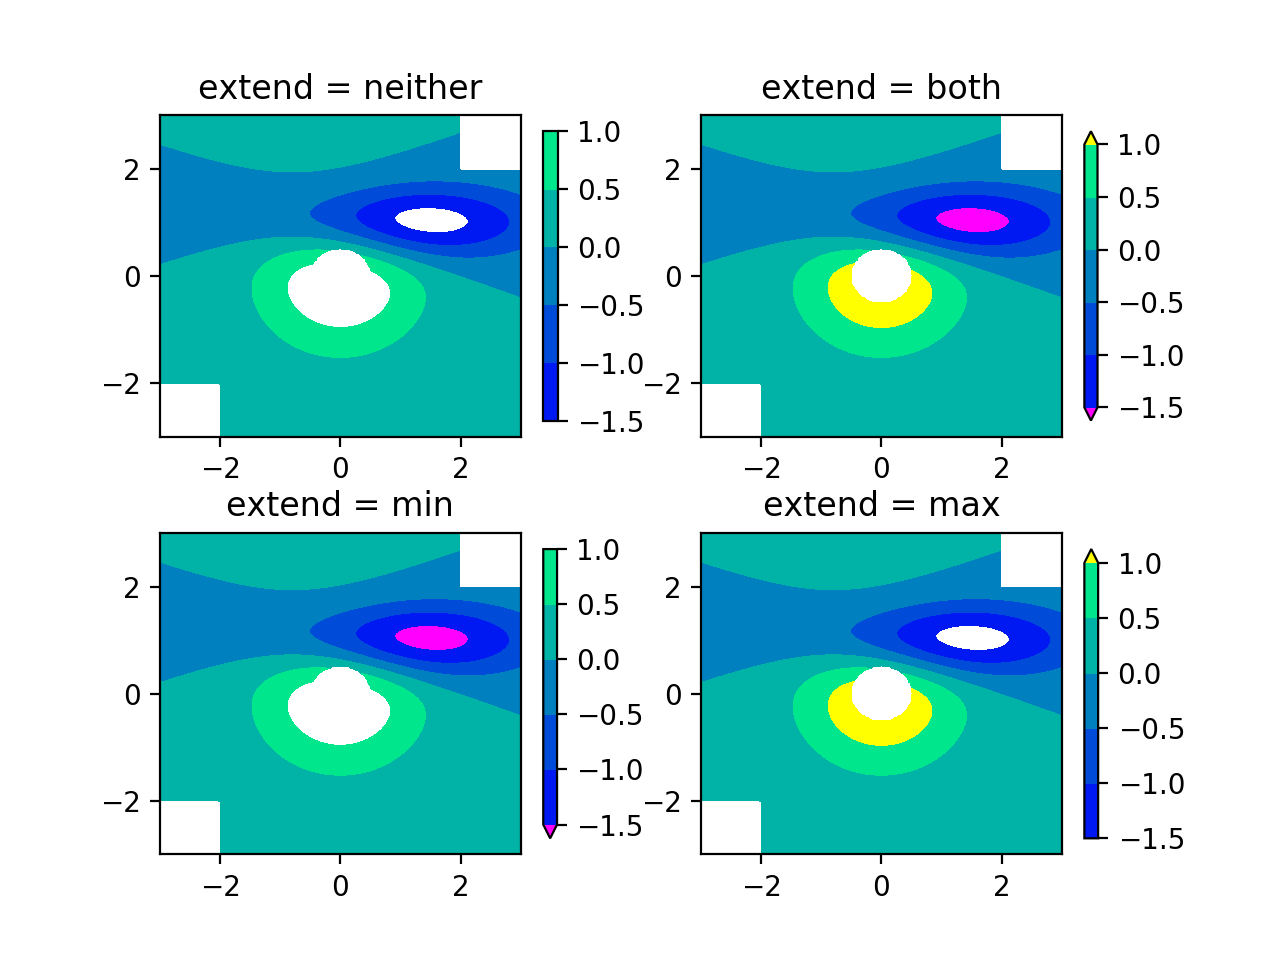

In [37]:
import numpy as np
import matplotlib.pyplot as plt

origin = 'lower'
#origin = 'upper'

delta = 0.025

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10 * (Z1 - Z2)

nr, nc = Z.shape

# put NaNs in one corner:
Z[-nr//6:, -nc//6:] = np.nan
# contourf will convert these to masked


Z = np.ma.array(Z)
# mask another corner:
Z[:nr//6, :nc//6] = np.ma.masked

# mask a circle in the middle:
interior = np.sqrt((X**2) + (Y**2)) < 0.5
Z[interior] = np.ma.masked

# We are using automatic selection of contour levels;
# this is usually not such a good idea, because they don't
# occur on nice boundaries, but we do it here for purposes
# of illustration.

# Illustrate all 4 possible "extend" settings:
extends = ["neither", "both", "min", "max"]
cmap = plt.cm.get_cmap("winter")
cmap.set_under("magenta")
cmap.set_over("yellow")
# Note: contouring simply excludes masked or nan regions, so
# instead of using the "bad" colormap value for them, it draws
# nothing at all in them.  Therefore the following would have
# no effect:
# cmap.set_bad("red")

fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.3)

for ax, extend in zip(axs.ravel(), extends):
    cs = ax.contourf(X, Y, Z, levels, cmap=cmap, extend=extend, origin=origin)
    fig.colorbar(cs, ax=ax, shrink=0.9)
    ax.set_title("extend = %s" % extend)
    ax.locator_params(nbins=4)

plt.show()

In [133]:
def show_images(location_list):
    plt.close('all')
    fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(10*3,6.180))
    x = 1
    y = 2
    z = 3
    zmin = 0
    zmax=20
    xlabel="xlabel"
    ylabel="ylabel"
    title = ""
    titlefontsize = 28
    for image_idx, filename in enumerate(location_list):
        temp = re.findall(r"\d+", filename.split("/")[-1])[0]
        data = np.loadtxt(filename)
        data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
        data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
        data = data[~(data[:,z] < zmin)]

        xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
        yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
        zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
        # plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
        jet = cm = plt.get_cmap('jet')
        print(jet)
        # plt.contourf(xi, yi, zi, 20, cmap='rainbow')
#         plt.figure()
        cs = ax[image_idx].contourf(xi, yi, zi, 30, cmap='jet')
        # plt.xlim(xmin, xmax)
        cs.set_clim(zmin, zmax)
#         fig.clim()
        ax[image_idx].set_title("temp = %s" % temp)
    fig.colorbar(cs, ax=ax[2], shrink=1)
#     fig.colorbar()

#         plt.xlabel(xlabel)
#         plt.ylabel(ylabel)
#         plt.title(title, y=1.02, fontsize = titlefontsize)


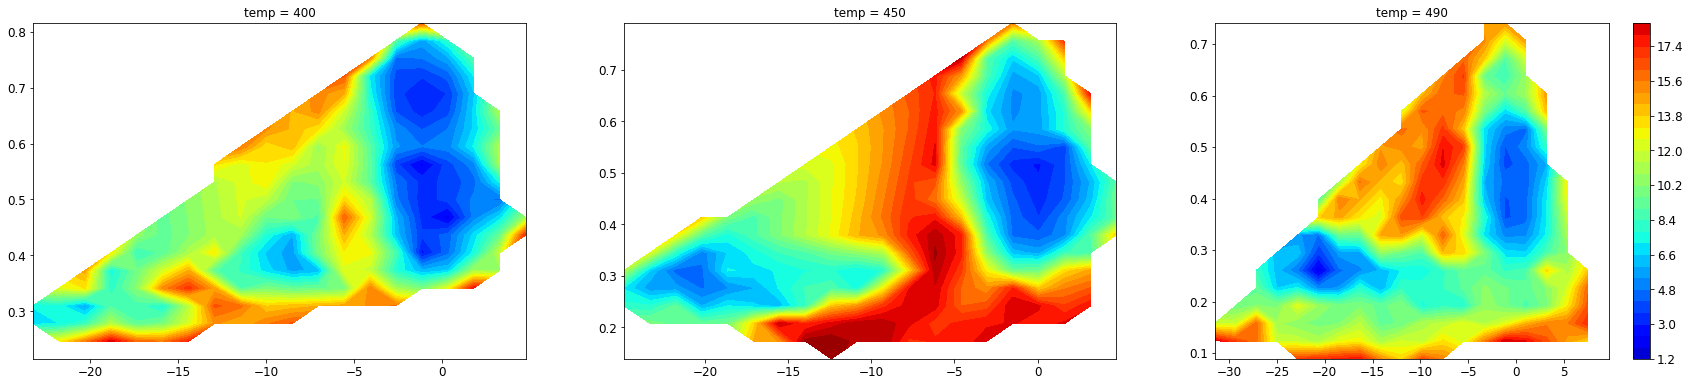

In [134]:
show_images(location_list)

In [92]:
location_list = []
temp_list = [400, 450, 490]
for temp in temp_list:
    location_list.append(location + "pmf-" + str(temp) +".dat")

In [143]:
def readPMF2d(pre):
    perturbation_table = {0:"original", 1:"p_mem",
                          2:"m_mem", 3:"p_lipid",
                          4:"m_lipid", 5:"p_go",
                          6:"m_go", 7:"p_rg", 8:"m_rg"}
    pmf_list = {
        "perturbation":list(perturbation_table.keys()),
        "force":["0.0", "0.1", "0.2"]
    }
    pmf_list_data = expand_grid(pmf_list)
    all_pmf_list = []
    for index, row in pmf_list_data.iterrows():
        force = row["force"]
        perturbation = row["perturbation"]
        if perturbation == 0:
            location = pre + f"/force_{force}/pmf-*.dat"
            pmf_list = glob.glob(location)
            change = "none"
            upOrDown = "none"
        else:
            location = pre + f"/force_{force}/perturbation-{perturbation}-pmf-*.dat"
            pmf_list = glob.glob(location)
            change = perturbation_table[perturbation].split("_")[-1]
            upOrDown = perturbation_table[perturbation].split("_")[0]
        # print(location)
        name_list = ["f", "df", "e", "s"]
        names = ["x", "y"] + name_list
        for location in pmf_list:
            # print(location)
            temp = re.findall(r'pmf-(\d+)', location)
            if len(temp) != 1:
                raise ValueError('Not expected to see more than one or none')
            else:
                temp = temp[0]
            data = pd.read_table(location, skiprows=2, sep='\s+', names=names).assign(upOrDown=upOrDown, change=change, force=force, temp=temp, perturbation=perturbation_table[perturbation])
            all_pmf_list.append(data)

    return pd.concat(all_pmf_list).dropna().reset_index()

In [145]:
readPMF2d("/Users/weilu/Research/server/feb_2018/week_of_feb12/old_freeEnergy_rg_0.1_lipid_1.0_mem_1_0/rg_0.1_lipid_1.0_mem_1_350-550/2d_z_qw")

,index,x,y,f,df,e,s,change,force,perturbation,temp,upOrDown
0,0,-33.129,0.089,10.638,0.0,-265.863,-276.502,none,0.0,original,610,none
1,1,-33.129,0.114,14.220,0.0,-296.003,-310.223,none,0.0,original,610,none
2,30,-31.482,0.089,10.051,0.0,-252.013,-262.064,none,0.0,original,610,none
3,31,-31.482,0.114,10.923,0.0,-275.008,-285.931,none,0.0,original,610,none
4,33,-31.482,0.165,28.328,0.0,-499.923,-528.251,none,0.0,original,610,none
5,60,-29.836,0.089,12.247,0.0,-281.773,-294.020,none,0.0,original,610,none
6,61,-29.836,0.114,6.898,0.0,-244.215,-251.113,none,0.0,original,610,none
7,63,-29.836,0.165,26.163,0.0,-422.158,-448.321,none,0.0,original,610,none
8,90,-28.189,0.089,9.861,0.0,-267.769,-277.630,none,0.0,original,610,none
9,91,-28.189,0.114,5.660,0.0,-247.170,-252.831,none,0.0,original,610,none


In [139]:
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())],
                        columns=dictionary.keys())

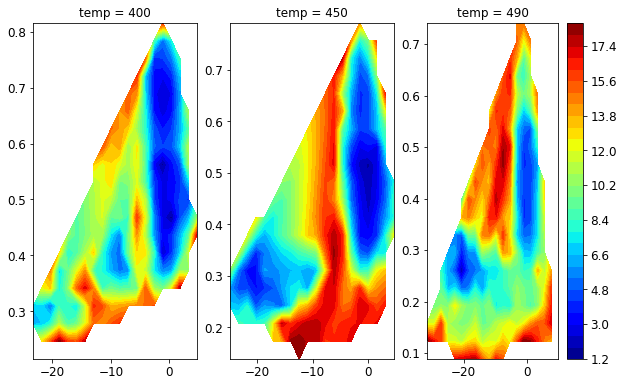

In [100]:
show_images(location_list)

In [ ]:
'/Users/weilu/Research/server/feb_2018/week_of_feb12/old_freeEnergy_rg_0.1_lipid_1.0_mem_1_0/rg_0.1_lipid_1.0_mem_1_350-550/2d_z_qw/force_0.0/perturbation-1-pmf-390.dat'

In [137]:
location

'/Users/weilu/Research/server/feb_2018/week_of_feb12/old_freeEnergy_rg_0.1_lipid_1.0_mem_1_0/rg_0.1_lipid_1.0_mem_1_350-550/2d_z_qw/force_0.0/'

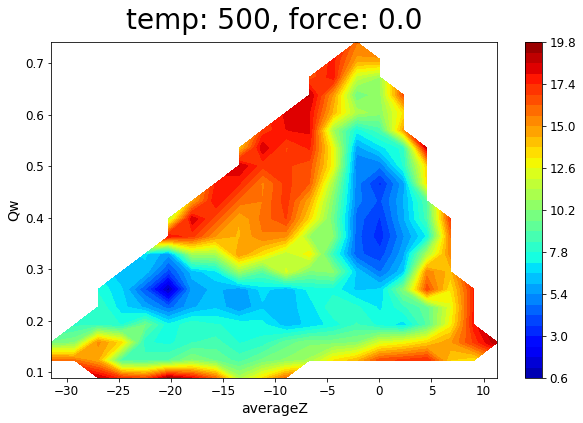

In [136]:
pre = "/Users/weilu/Research/server/feb_2018"
folder = pre + "/week_of_feb12/old_freeEnergy_rg_0.1_lipid_1.0_mem_1_0/rg_0.1_lipid_1.0_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 500
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


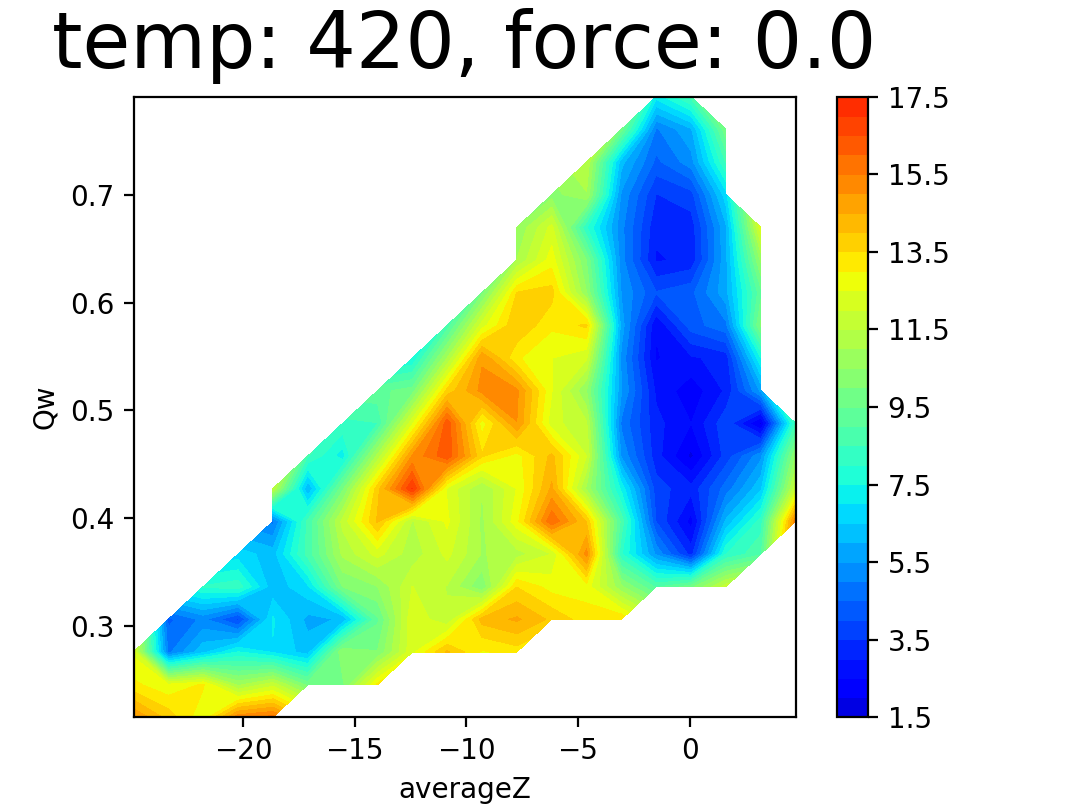

In [17]:
pre = "/Users/weilu/Research/server/feb_2018"
folder = pre + "/week_of_feb12/old_freeEnergy_rg_0.1_lipid_1.0_mem_1_0/rg_0.1_lipid_1.0_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 420
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


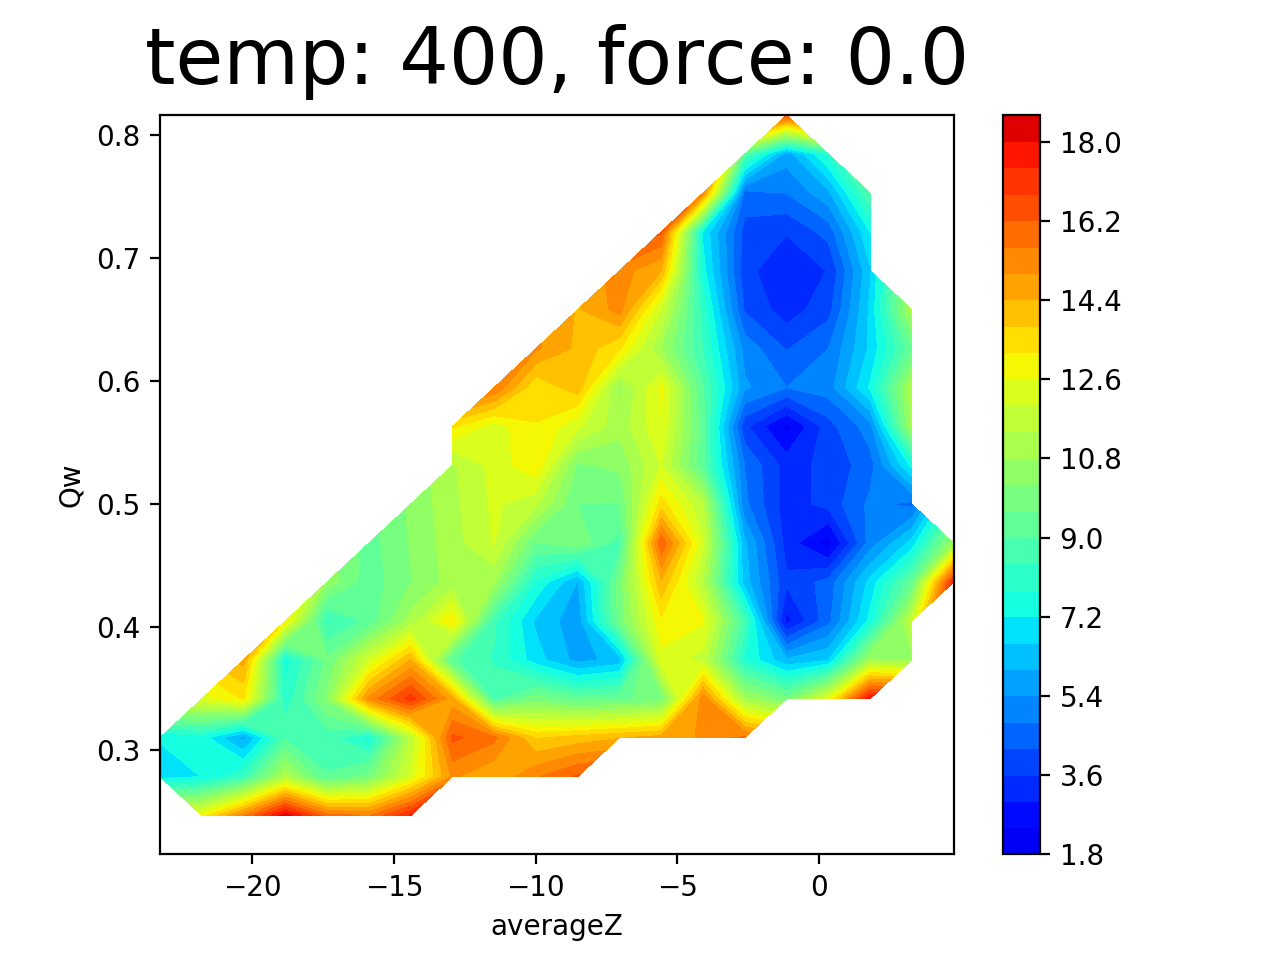

In [10]:
pre = "/Users/weilu/Research/server/feb_2018"
folder = pre + "/week_of_feb12/old_freeEnergy_rg_0.1_lipid_1.0_mem_1_0/rg_0.1_lipid_1.0_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 400
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


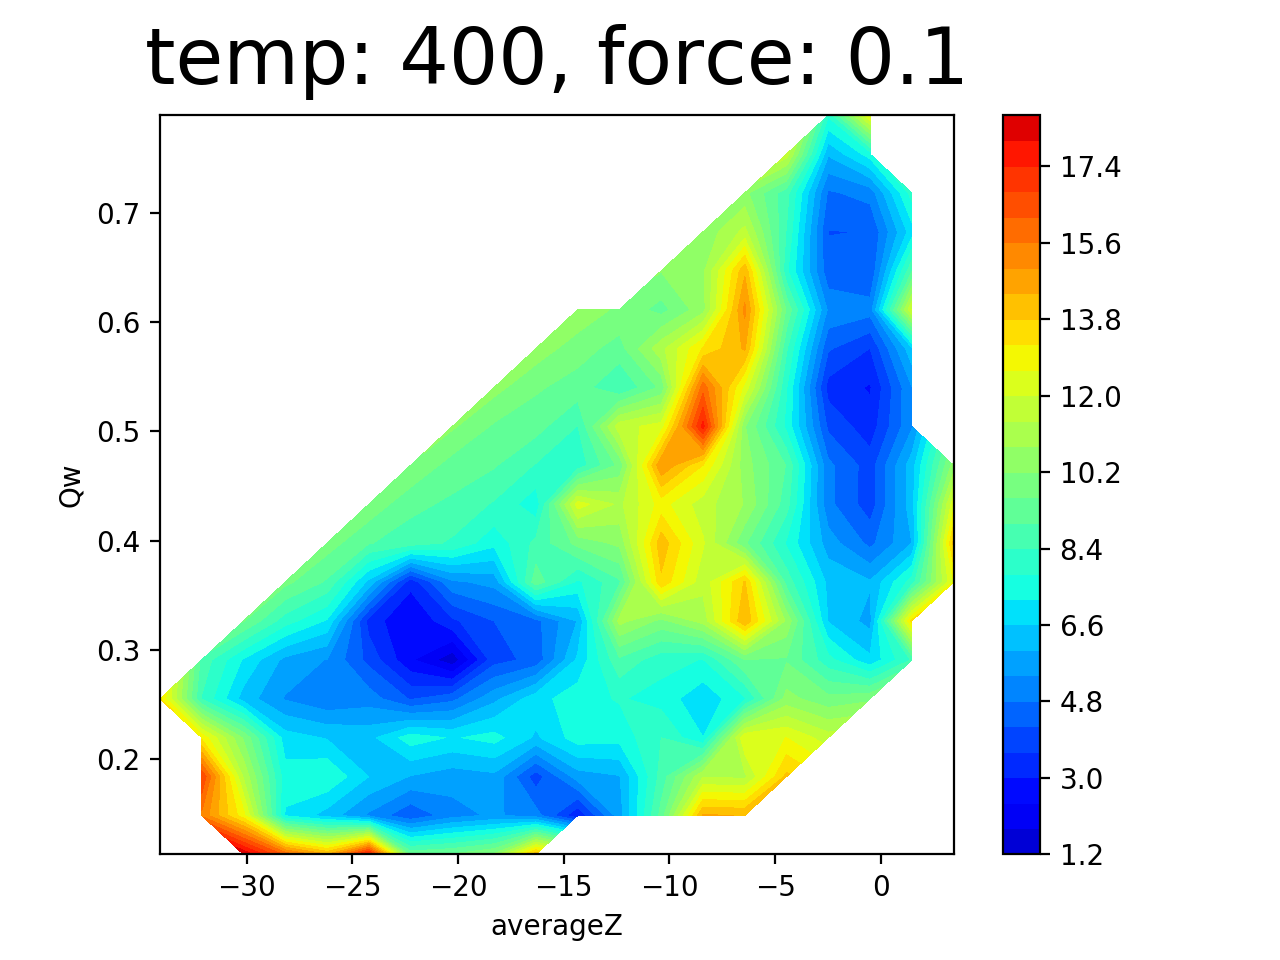

In [49]:
pre = "/Users/weilu/Research/server/jan_2018"
folder = pre + "/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.1
temp = 400
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


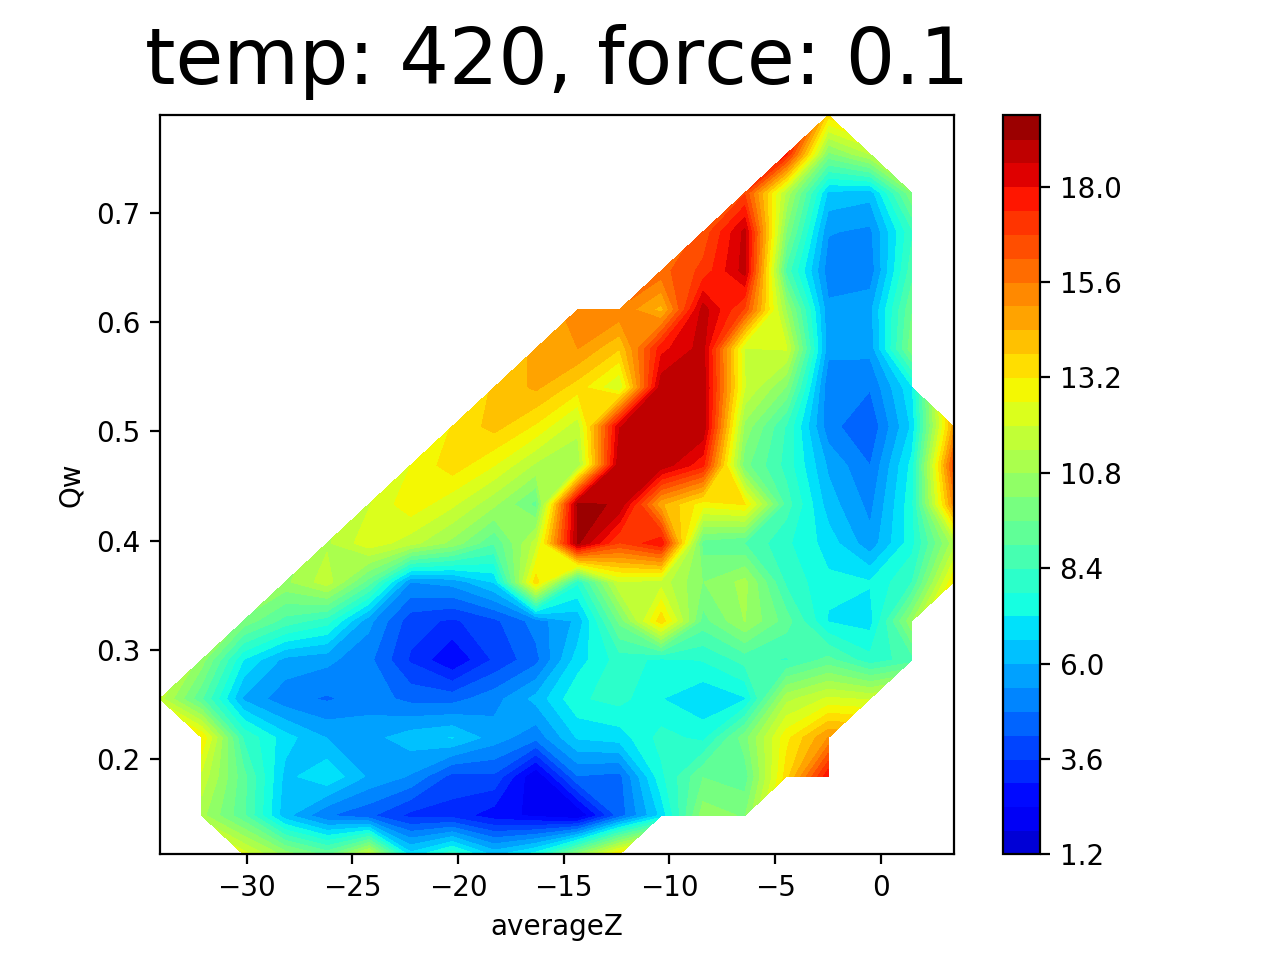

In [50]:
pre = "/Users/weilu/Research/server/jan_2018"
folder = pre + "/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.1
temp = 420
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


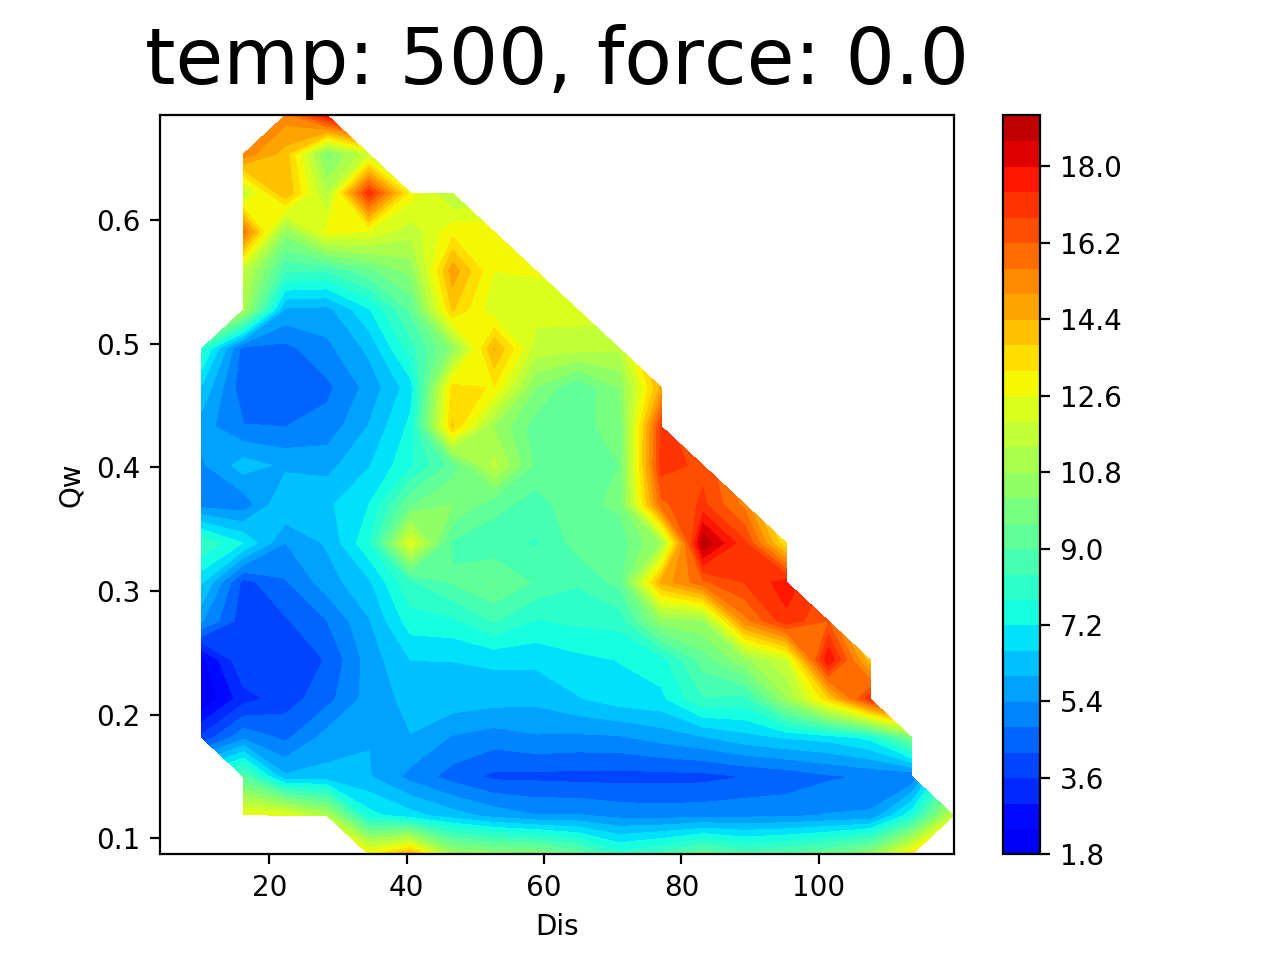

In [45]:
pre = "/Users/weilu/Research/server/jan_2018"
folder = pre + "/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "Qw"
y_axis = "Dis"
force = 0.0
temp = 500
name_convertion_dic = {"averageZ":"z", "Qw":"qw", "Dis":"dis"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=y_axis, ylabel=x_axis, title=title)

<IPython.core.display.Javascript object>


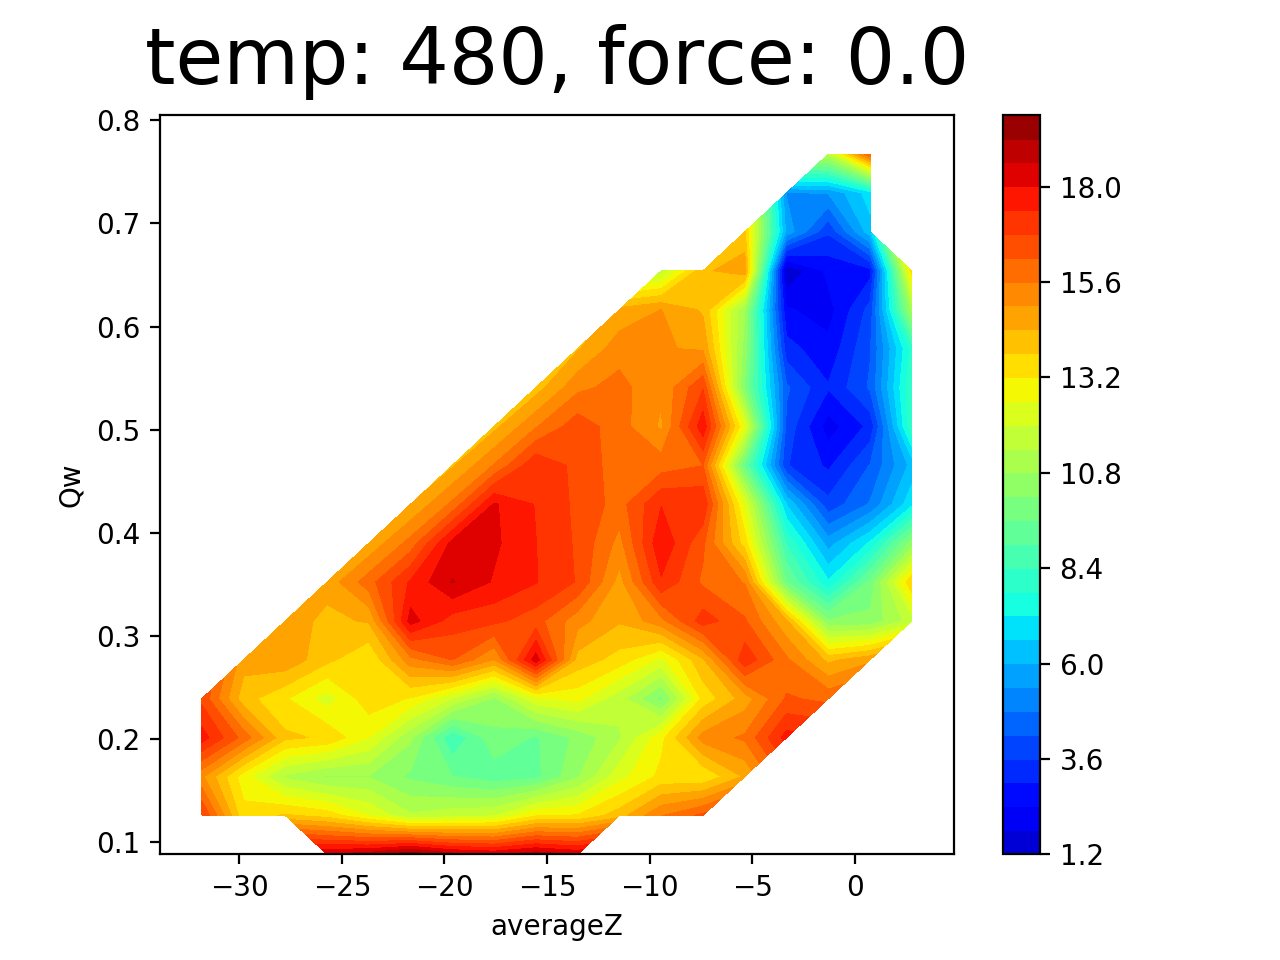

In [86]:
pre = "/Users/weilu/Research/server/jan_2018/week_of_jan22"
folder = pre + "/freeEnergy_rg_0.3_lipid_0.6_mem_1_2/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 480
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title, zmax=20)

<IPython.core.display.Javascript object>


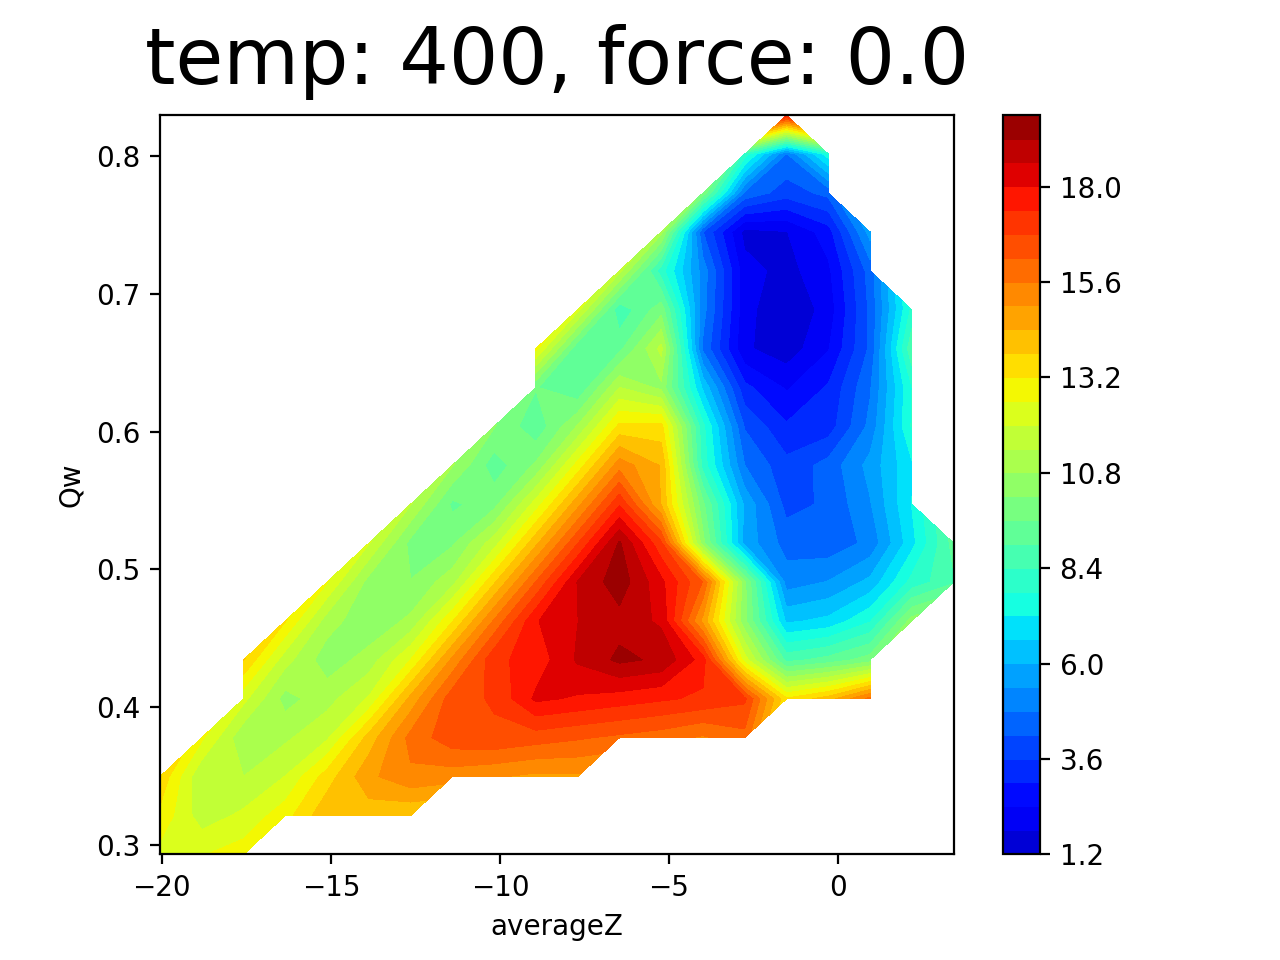

In [48]:
pre = "/Users/weilu/Research/server/jan_2018/week_of_jan22"
folder = pre + "/freeEnergy_rg_0.3_lipid_0.6_mem_1_2/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 400
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/quick_2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


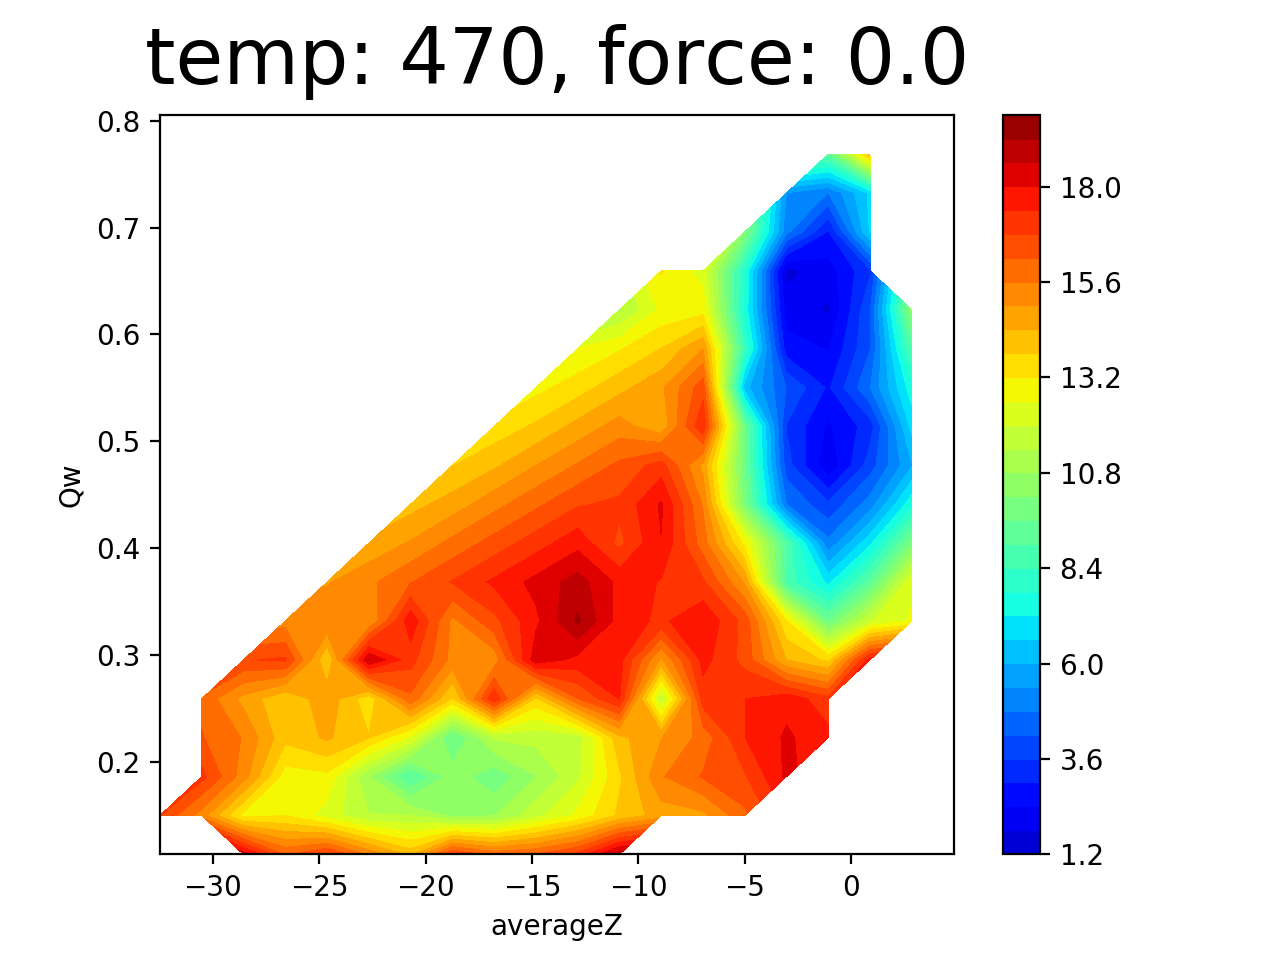

In [52]:
pre = "/Users/weilu/Research/server/jan_2018/week_of_jan22"
folder = pre + "/freeEnergy_rg_0.3_lipid_0.6_mem_1_2/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 470
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/quick_2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


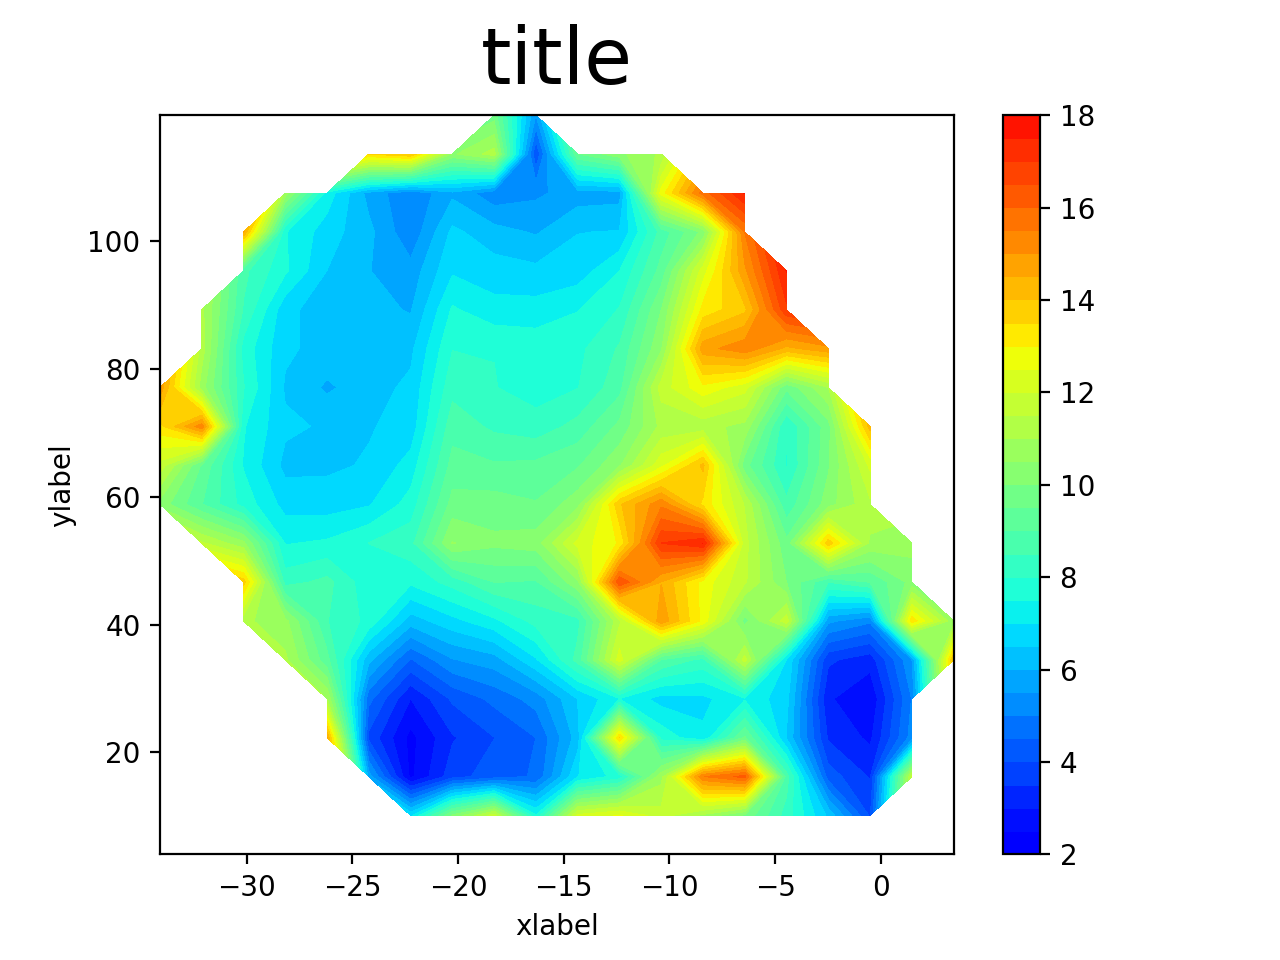

In [16]:
pre = "/Users/weilu/Research/server/jan_2018"
folder = pre + "/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550"
location = folder + "/2d_z_dis/force_0.1/"
plot2d(location, temp=400)

<IPython.core.display.Javascript object>


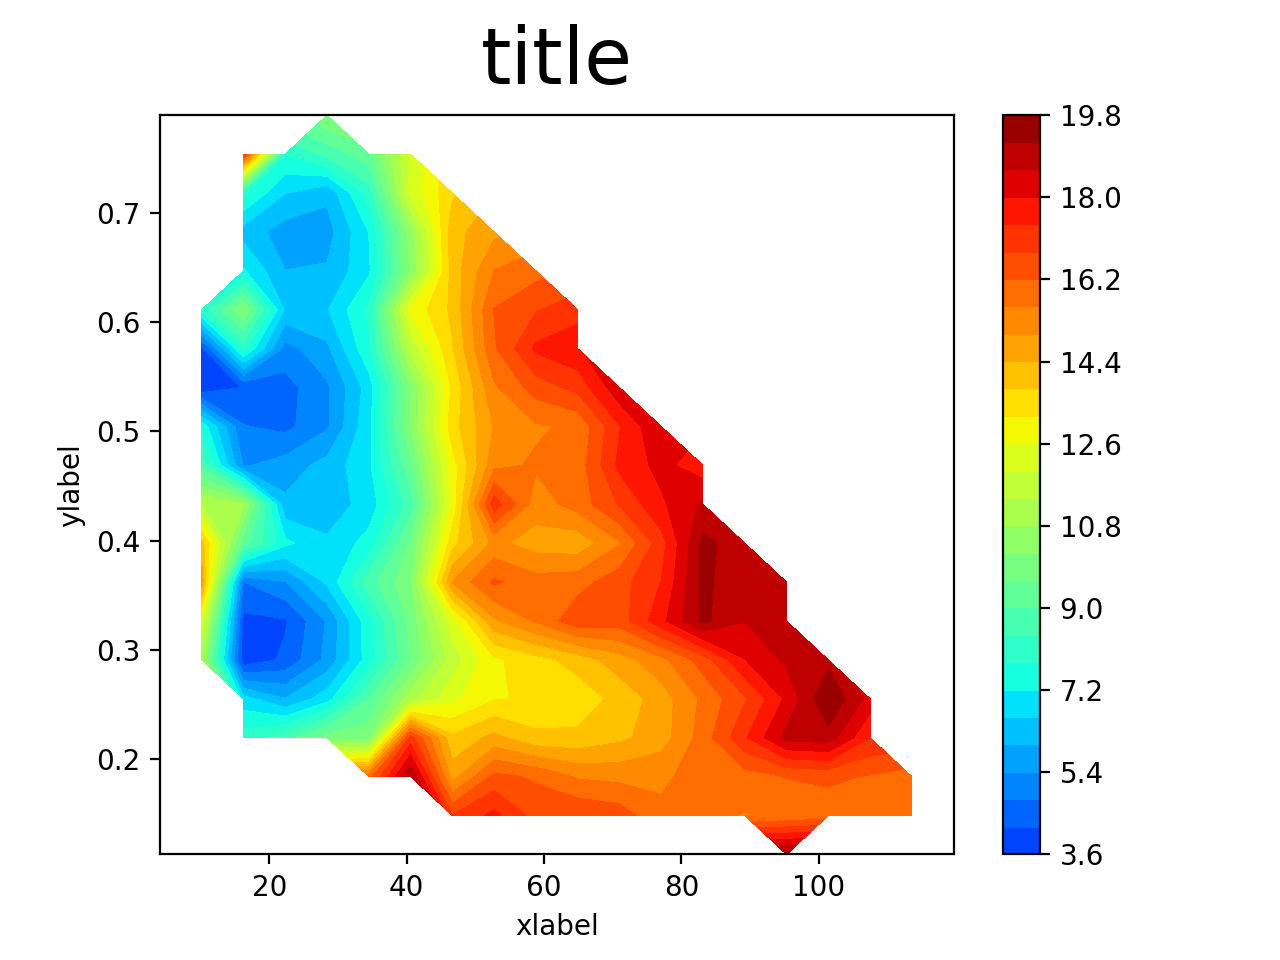

In [6]:
pre = "/Users/weilu/Research/server/jan_2018"
folder = pre + "/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550"
location = folder + "/2d_qw_dis/force_0.0/"
plot2d(location, temp=400)

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_qw/force_0.1/"
filename = location + "pmf-400.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
# plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_qw/force_0.0/"
filename = location + "pmf-410.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_qw/force_0.1/"
filename = location + "pmf-450.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_qw/force_0.0/"
filename = location + "pmf-450.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_qw/force_0.0/"
filename = location + "pmf-500.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_dis/force_0.1/"
filename = location + "pmf-400.dat"
xmin, xmax = -40, 10
ymin, ymax = 0, 150
zmin, zmax = 0, 20
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_dis/force_0.0/"
filename = location + "pmf-400.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_dis/force_0.0/"
filename = location + "pmf-450.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_qw_dis/force_0.0/"
filename = location + "pmf-450.dat"
xmin, xmax = 0, 120
ymin, ymax = 0, 1
zmin, zmax = 0, 20

data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
np.loadtxt(filename).shape